<a href="https://colab.research.google.com/github/abhishekdhasmana17/ted-talk-view-prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Ted Talk Views Prediction*



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Abhishek Dhasmana


# **Project Summary -**

I used stackoverflow (https://stackoverflow.com/), chatGPT (https://chat.openai.com/chat) to solve the problems I have faced throughout the analysis.


# **GitHub Link -**

https://github.com/abhishekdhasmana17/ted-talk-view-prediction

# **Problem Statement**


A TED Talk prediction project would involve using machine learning techniques to predict various aspects of a TED Talk, such as the popularity of a talk or the likelihood that a talk will go viral. The project would likely involve the following steps:

1 - Collecting a dataset of TED Talks.

2 - Performing EDA, Preprocessing the data, including cleaning and structuring the data, and extracting relevant features from the transcripts.

3 - Training a machine learning model on the dataset.

4 - Testing and evaluating the model on a separate dataset to determine its accuracy and effectiveness.

Finally,

Deploying the model to make predictions on new, unseen TED Talks.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [52]:
# Import Libraries and updating libraries as per needs (will be done numerous times)
%matplotlib inline
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [53]:
# Load Dataset
url = 'https://drive.google.com/file/d/1_H4XvX0tDBJ_kYON2yA23FWKV4_3Tlyd/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Dataset First View

In [54]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [55]:
# Dataset Rows & Columns count

#computing number of rows
rows = len(df.axes[0])

#computing number of columns
cols = len(df.axes[1])

print(rows, cols)   

4005 19


### Dataset Information

In [56]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [57]:
# Dataset Duplicate Value Count
pd.DataFrame([[col, df[col].duplicated().sum()]  for  col  in df], columns = ['Column Name', 'Duplicate value Count'])

,Column Name,Duplicate value Count
0,talk_id,0
1,title,0
2,speaker_1,731
3,all_speakers,698
4,occupations,1955
5,about_speakers,1027
6,views,9
7,recorded_date,2670
8,published_date,1043
9,event,3546


#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count
pd.DataFrame([[col, df[col].isna().sum()]  for  col  in df], columns = ['Column Name','Missing Count'])

,Column Name,Missing Count
0,talk_id,0
1,title,0
2,speaker_1,0
3,all_speakers,4
4,occupations,522
5,about_speakers,503
6,views,0
7,recorded_date,1
8,published_date,0
9,event,0


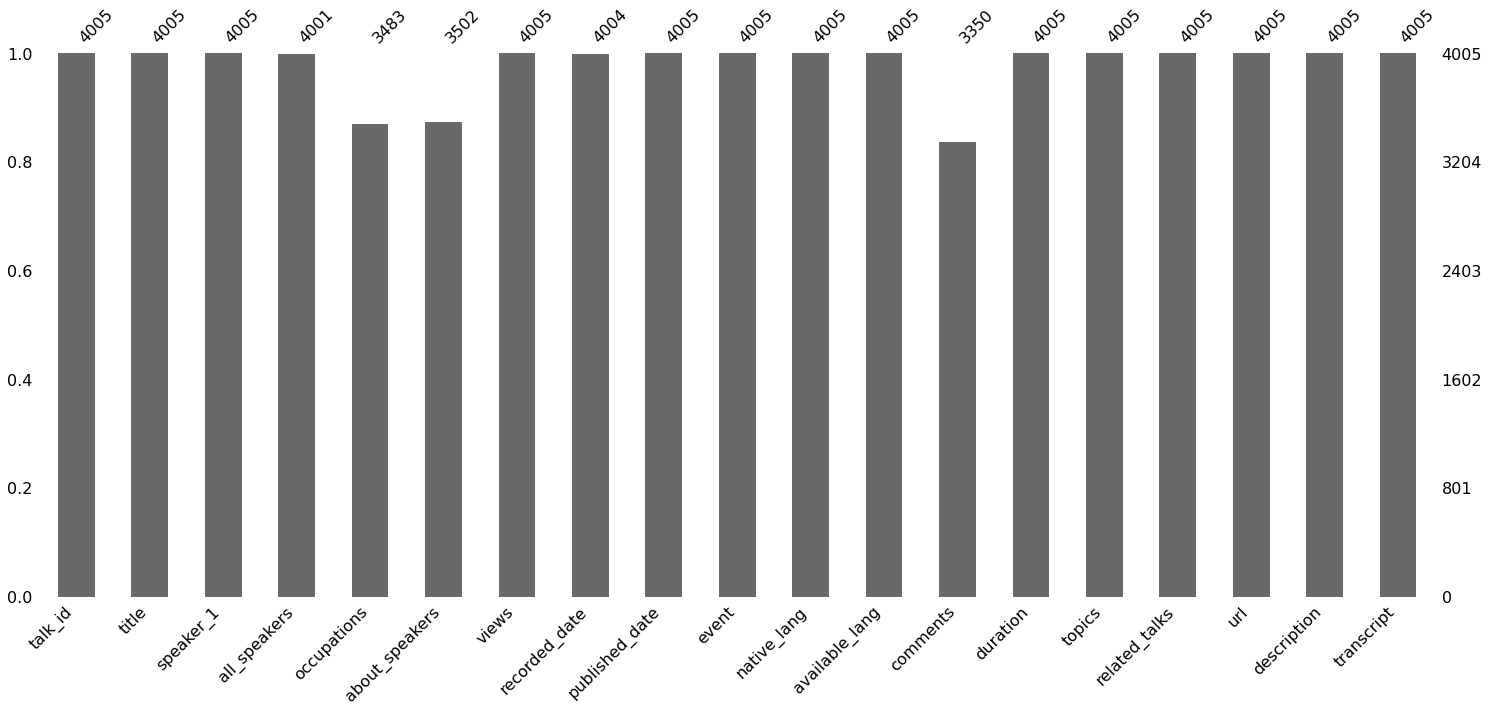

In [59]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

TED (stands for “Technology, Entertainment, and Design”) was founded in 1984 by Richard Salman as a nonprofit organization. The aim is to invite people from TED backgrounds to give a talk or share experience with the world. 

The Data set that i have contains 4000 records along with many details like talk_id, duration, event, etc.

Also, there are ample amount of null values in details(feature) like occupation,comments and about_speaker. 

## ***2. Understanding Your Variables***

In [60]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [61]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description 

**talk_id**: unique id number provided by TED


**title**: Title of the talk

**speaker_1**: First speaker in TED's speaker list

**all_speakers**: Speakers in the talk

**occupations**: Occupations of the speakers

**about_speaker**: Blurb about each speaker

**recorded_date**: Date the talk was recorded

**published_date**: Date the talk was published to TED.com

**event**: Event or medium in which the talk was given

**native_lang**: Language the talk was given in

**available_lang**: All available languages (lang_code) for a talk

**comments**: Count of comments

**duration**: Duration in seconds

**topics**: Related tags or topics for the talk

**related_talks**: Related talks (key='talk_id',value='title')

**url**: URL of the talk

**description**: Description of the talk

**transcript**: Full transcript of the talk

### Check Unique Values for each variable.

In [62]:
# Check Unique Values for each variable.
col_unique = df.columns.tolist()
for name in col_unique:
  print(df[name].unique())


[    1    92     7 ... 62263 62784 62794]
['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
["{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"
 "{0: 'In Hans Rosling’s hands, data sings. Global t

## 3. ***Data Wrangling***

### Data Wrangling Code

In [63]:
# Write your code to make your dataset analysis ready.
df.head().T

,0,1,2,3,4
talk_id,1,92,7,53,66
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson
all_speakers,{0: 'Al Gore'},{0: 'Hans Rosling'},{0: 'David Pogue'},{0: 'Majora Carter'},{0: 'Sir Ken Robinson'}
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}"
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe..."
views,3523392,14501685,1920832,2664069,65051954
recorded_date,2006-02-25,2006-02-22,2006-02-24,2006-02-26,2006-02-25
published_date,2006-06-27,2006-06-27,2006-06-27,2006-06-27,2006-06-27
event,TED2006,TED2006,TED2006,TED2006,TED2006


In [64]:
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [65]:
#creating dataframe containing english as native language
en_native_lang = df[df['native_lang'] == 'en']
en_native_lang.shape

(3957, 19)

In above code we can see that most of our Ted talks are delivered in English language.

In [66]:
#checking null values 
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [67]:
#replacing null values 
df['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)
df['about_speakers'].fillna(str({0:''}),inplace=True,axis=0)
df['all_speakers'].fillna(str({0:['other']}),inplace=True,axis=0)
df['comments'].fillna((0),inplace=True,axis=0)

In [68]:
#null values are treated
df.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [69]:
df['occupations']

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                   {0: ['other']}
4002                          {0: ['law researcher']}
4003                                   {0: ['other']}
4004                                   {0: ['other']}
Name: occupations, Length: 4005, dtype: object

In [70]:
df.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4005,4005,4005,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3307,2050,2978,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['other']},{0: ''},2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,34,522,503,97,27,556,3957,24,8,1,1,1,1


Formatting features containg date andd time for EDA.

In [71]:
#formatting and adding features as per our requirements
#importing libraries containg date time formatting packages
from datetime import datetime
import calendar
today=datetime.now()
today.strftime('%Y-%m-%d')
import datetime

In [72]:
# Recorded date , Published date :formatting:
df['recorded_date']= pd.to_datetime(df['recorded_date'])
df['published_date']= pd.to_datetime(df['published_date'])
#with above code string type are converted into date type values

In [73]:
# Time period Ted talk has been published
last_publishing_date= df['published_date'].max()
df['time_period_of_talk']= last_publishing_date - pd.DatetimeIndex(df['published_date'])
df['time_period_of_talk']

0      5056 days
1      5056 days
2      5056 days
3      5056 days
4      5056 days
          ...   
4000      3 days
4001      3 days
4002      2 days
4003      0 days
4004      0 days
Name: time_period_of_talk, Length: 4005, dtype: timedelta64[ns]

In [74]:
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['published_month'] = pd.DatetimeIndex(df['published_date']).month
df['published_year'] = pd.DatetimeIndex(df['published_date']).year
df['published_date'] = pd.DatetimeIndex(df['published_date']).day

In [75]:
# Average daily views
df['daily_views'] = df['views'] / ( df['time_period_of_talk'].apply(lambda x : x.days) + 1 )

In [76]:
df.head().T

,0,1,2,3,4
talk_id,1,92,7,53,66
title,Averting the climate crisis,The best stats you've ever seen,Simplicity sells,Greening the ghetto,Do schools kill creativity?
speaker_1,Al Gore,Hans Rosling,David Pogue,Majora Carter,Sir Ken Robinson
all_speakers,{0: 'Al Gore'},{0: 'Hans Rosling'},{0: 'David Pogue'},{0: 'Majora Carter'},{0: 'Sir Ken Robinson'}
occupations,{0: ['climate advocate']},{0: ['global health expert; data visionary']},{0: ['technology columnist']},{0: ['activist for environmental justice']},"{0: ['author', 'educator']}"
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob...",{0: 'David Pogue is the personal technology co...,{0: 'Majora Carter redefined the field of envi...,"{0: ""Creativity expert Sir Ken Robinson challe..."
views,3523392,14501685,1920832,2664069,65051954
recorded_date,2006-02-25 00:00:00,2006-02-22 00:00:00,2006-02-24 00:00:00,2006-02-26 00:00:00,2006-02-25 00:00:00
published_date,27,27,27,27,27
event,TED2006,TED2006,TED2006,TED2006,TED2006


In [81]:
#Updating dataframe with only required features
digital_df   = ['duration', 'talk_id', 'comments']
date_data_df   = ['recorded_date', 'published_date', 'time_period_of_talk', 'published_month', 'published_year', 'daily_views']
class_df = ['event']

text_df1 = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ]

off_calc_df  = ['url' , 'all_speakers' , 'speaker_1' , 'native_lang']
text_df2 = ['topics', 'available_lang', 'related_talks']

target = ['views']


full_df = df[target + text_df1 + text_df2 + off_calc_df + class_df + date_data_df + digital_df]

In [82]:
full_df.shape

(4005, 23)

In [84]:
df_new = df[target  + digital_df + class_df + date_data_df ]
df_new.head().T    

,0,1,2,3,4
views,3523392,14501685,1920832,2664069,65051954
duration,977,1190,1286,1116,1164
talk_id,1,92,7,53,66
comments,272.0,628.0,124.0,219.0,4931.0
event,TED2006,TED2006,TED2006,TED2006,TED2006
recorded_date,2006-02-25 00:00:00,2006-02-22 00:00:00,2006-02-24 00:00:00,2006-02-26 00:00:00,2006-02-25 00:00:00
published_date,27,27,27,27,27
time_period_of_talk,5056 days 00:00:00,5056 days 00:00:00,5056 days 00:00:00,5056 days 00:00:00,5056 days 00:00:00
published_month,6,6,6,6,6
published_year,2006,2006,2006,2006,2006


In [85]:
df_new.shape

(4005, 11)

### What all manipulations have you done and insights you found?

The Dataset itself is self explanatory, that is, all the features are clear to understand.

Treating null values is a crucial task in orrder to make any analysis.

feature like comments is again an important feature which will be needed to make future predictions. 

Formatting dates in oerder to draw assumptions about the data set more precisely.

In order to make prediction we required one target variable, target variable with which I will be malking predictions is **views**

Checking its relation with other attributes will help us understand what the viewer really wants.

I also updated original ****df**** with ****new_df**** where I only included those features whicl will help me with the Exploratory Data Analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***